In [ ]:
from google.colab import drive
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_5t = pd.read_csv('/content/drive/MyDrive/Colab_/Artical2/file1code5.csv', delimiter= ',')
data_DS = pd.read_csv('/content/drive/MyDrive/Colab_/Artical2/file2_DS_16.csv', delimiter= ',')
data_7 = pd.read_csv('/content/drive/MyDrive/Colab_/Artical2/file4_LL_7B.csv', delimiter= ',')
data_13 = pd.read_csv('/content/drive/MyDrive/Colab_/Artical2/file3_LL_13B.csv', delimiter= ',')


In [ ]:
data_13['Pattern'].fillna('Unknown', inplace=True)
data_13["Pattern"].value_counts()

<ipython-input-4-3203772516ce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_13['Pattern'].fillna('Unknown', inplace=True)


Pattern
Unknown            163
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Builder            101
Singleton          101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [ ]:
data_7['Pattern'].fillna('Unknown', inplace=True)
data_7["Pattern"].value_counts()

<ipython-input-5-a756b2756330>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_7['Pattern'].fillna('Unknown', inplace=True)


Pattern
Unknown            163
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Builder            101
Singleton          101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [ ]:
data_DS['Pattern'].fillna('Unknown', inplace=True)
data_DS["Pattern"].value_counts()

<ipython-input-6-62ed95303d0b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_DS['Pattern'].fillna('Unknown', inplace=True)


Pattern
Unknown            163
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Builder            101
Singleton          101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [ ]:
data_5t['Pattern'].fillna('Unknown', inplace=True)
data_5t["Pattern"].value_counts()


<ipython-input-7-8e16363c5b08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_5t['Pattern'].fillna('Unknown', inplace=True)


Pattern
Unknown            163
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Builder            101
Singleton          101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Best_classifiers = {
    'Neural Network': MLPClassifier(max_iter=1000),
    'SGD Classifier': SGDClassifier(class_weight='balanced'),
    'Linear SVC': LinearSVC(class_weight='balanced'),
    'NuSVC': NuSVC(class_weight='balanced'),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Support Vector Machine Balanced': SVC(class_weight='balanced'),
    'Logistic Regression Balanced': LogisticRegression(class_weight='balanced'),
    'Ridge Classifier': RidgeClassifier(class_weight='balanced'),
    'Stochastic Gradient Descent': SGDClassifier(class_weight='balanced'),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'LDA': LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.2),
    'Ridge Classifier': RidgeClassifier(),
    'Logistic Regression': LogisticRegression(),
     'MLP Neural Network': make_pipeline(
        StandardScaler(),
        MLPClassifier(max_iter=500, random_state=42)
    ),
    'Voting Classifier': VotingClassifier(estimators=[
        ('lr', make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42))),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], voting='soft'),
    'Stacking Classifier': StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)))
    ], final_estimator=make_pipeline(StandardScaler(), LogisticRegression(max_iter=500, random_state=42)))
}




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'pattern' is the target column
label_encoder = LabelEncoder()
data_5t['pattern_encoded'] = label_encoder.fit_transform(data_5t['Pattern'])
data_13['pattern_encoded'] = label_encoder.fit_transform(data_13['Pattern'])
data_7['pattern_encoded'] = label_encoder.fit_transform(data_7['Pattern'])
data_DS['pattern_encoded'] = label_encoder.fit_transform(data_DS['Pattern'])


In [ ]:
y_5t = data_5t['pattern_encoded']
X_5t = data_5t.drop(['Pattern', 'pattern_encoded','Directory','File'], axis=1)
y_13 = data_13['pattern_encoded']
X_13 = data_13.drop(['Pattern', 'pattern_encoded','Directory','File', 'Combined'], axis=1)
y_7 = data_7['pattern_encoded']
X_7 = data_7.drop(['Pattern', 'pattern_encoded','Directory','File', 'Combined'], axis=1)
y_DS = data_DS['pattern_encoded']
X_DS = data_DS.drop(['Pattern', 'pattern_encoded','Directory','File', 'Combined'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
# Initialize StratifiedShuffleSplit with a 30% test size
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)



In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

def stratified_split(X: pd.DataFrame, y: pd.Series, test_size: float = 0.3, random_state: int = 42):
    """
    Performs a stratified train-test split.

    Parameters:
        X (pd.DataFrame): Features.
        y (pd.Series): Target labels.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed for reproducibility.

    Returns:
        X_train (pd.DataFrame): Training features.
        X_test (pd.DataFrame): Testing features.
        y_train (pd.Series): Training labels.
        y_test (pd.Series): Testing labels.
    """
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        return X_train, X_test, y_train, y_test


In [ ]:
X_train_5t, X_test_5t, y_train_5t, y_test_5t = stratified_split(X_5t, y_5t)


In [ ]:
X_train_7, X_test_7, y_train_7, y_test_7 = stratified_split(X_7, y_7)
X_train_DS, X_test_DS, y_train_DS, y_test_DS = stratified_split(X_DS, y_DS)
X_train_13, X_test_13, y_train_13, y_test_13 = stratified_split(X_13, y_13)


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_Best_classifiers(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classifiers using accuracy, precision, recall, and F1-score.

    Parameters:
        X_train, X_test (pd.DataFrame or np.ndarray): Training and test features.
        y_train, y_test (pd.Series or np.ndarray): Training and test labels.

    Returns:
        dict: Dictionary containing all evaluation metrics for each classifier.
    """
    classifiers = Best_classifiers
    results = {}

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision_macro': precision_score(y_test, y_pred, average='macro'),
            'recall_macro': recall_score(y_test, y_pred, average='macro'),
            'f1_macro': f1_score(y_test, y_pred, average='macro'),
        }

        print(f'{name} Metrics:')
        print(f"Accuracy: {results[name]['accuracy']:.2f}")
        print(f"Precision (Macro): {results[name]['precision_macro']:.2f}")
        print(f"Recall (Macro): {results[name]['recall_macro']:.2f}")
        print(f"F1-Score (Macro): {results[name]['f1_macro']:.2f}")
        print('-' * 30)

    return results


In [ ]:
data_5t["Pattern"].unique()

array(['AbstractFactory', 'Unknown', 'Facade', 'Adapter', 'Memento',
       'Singleton', 'Proxy', 'Prototype', 'Observer', 'Decorator',
       'FactoryMethod', 'Builder', 'Visitor', 'Strategy'], dtype=object)

In [ ]:
def evaluate_Best_classifiers(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classifiers using accuracy, precision, recall, and F1-score.
    Also saves predicted values.

    Parameters:
        X_train, X_test (pd.DataFrame or np.ndarray): Training and test features.
        y_train, y_test (pd.Series or np.ndarray): Training and test labels.

    Returns:
        dict: Dictionary containing evaluation metrics and predictions for each classifier.
    """
    results = {}

    for name, clf in Best_classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        results[name] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision_macro': precision_score(y_test, y_pred, average='macro'),
            'recall_macro': recall_score(y_test, y_pred, average='macro'),
            'f1_macro': f1_score(y_test, y_pred, average='macro'),

        }

        '''
        print(f'{name} Metrics:')
        print(f"Accuracy: {results[name]['accuracy']:.2f}")
        print(f"Precision (Macro): {results[name]['precision_macro']:.2f}")
        print(f"Recall (Macro): {results[name]['recall_macro']:.2f}")
        print(f"F1-Score (Macro): {results[name]['f1_macro']:.2f}")
        print('-' * 30)
        '''

    return results

In [ ]:
metrics_7

{'Neural Network': {'accuracy': 0.8008565310492506,
  'precision_macro': 0.8153108240340095,
  'recall_macro': 0.8069408379763623,
  'f1_macro': 0.8080277505709225},
 'SGD Classifier': {'accuracy': 0.7665952890792291,
  'precision_macro': 0.7868242000840137,
  'recall_macro': 0.7755082970445113,
  'f1_macro': 0.7735449405577645},
 'Linear SVC': {'accuracy': 0.7773019271948608,
  'precision_macro': 0.7935138899442011,
  'recall_macro': 0.780556477841331,
  'f1_macro': 0.7851807531318128},
 'NuSVC': {'accuracy': 0.702355460385439,
  'precision_macro': 0.7410283206586624,
  'recall_macro': 0.7007545749048907,
  'f1_macro': 0.709469229801024},
 'Linear Discriminant Analysis': {'accuracy': 0.7708779443254818,
  'precision_macro': 0.7911321923589455,
  'recall_macro': 0.7773471879029029,
  'f1_macro': 0.7802075595396066},
 'Support Vector Machine': {'accuracy': 0.6595289079229122,
  'precision_macro': 0.7157055620117186,
  'recall_macro': 0.6570086259808564,
  'f1_macro': 0.6712988227836042}

In [ ]:
metrics_DS

{'Neural Network': {'accuracy': 0.7580299785867237,
  'precision_macro': 0.7736091274222245,
  'recall_macro': 0.7626516535444875,
  'f1_macro': 0.7651128849439364},
 'SGD Classifier': {'accuracy': 0.7173447537473233,
  'precision_macro': 0.7547581356812848,
  'recall_macro': 0.7231879454530062,
  'f1_macro': 0.7196027233924358},
 'Linear SVC': {'accuracy': 0.7644539614561028,
  'precision_macro': 0.7678765257333089,
  'recall_macro': 0.7694962026812281,
  'f1_macro': 0.7677654606085506},
 'NuSVC': {'accuracy': 0.5867237687366167,
  'precision_macro': 0.7044429559974044,
  'recall_macro': 0.5820803438046206,
  'f1_macro': 0.6071834972714847},
 'Linear Discriminant Analysis': {'accuracy': 0.721627408993576,
  'precision_macro': 0.7437023559955891,
  'recall_macro': 0.7222780903260965,
  'f1_macro': 0.7271938845896307},
 'Support Vector Machine': {'accuracy': 0.5032119914346895,
  'precision_macro': 0.6920930829915265,
  'recall_macro': 0.49440452710770594,
  'f1_macro': 0.52402043960507

In [ ]:
metrics_13


{'Neural Network': {'accuracy': 0.8179871520342612,
  'precision_macro': 0.8273906691823979,
  'recall_macro': 0.8223560197996752,
  'f1_macro': 0.8231370104046736},
 'SGD Classifier': {'accuracy': 0.7730192719486081,
  'precision_macro': 0.7865107362331456,
  'recall_macro': 0.781447416923731,
  'f1_macro': 0.7752135287274078},
 'Linear SVC': {'accuracy': 0.7730192719486081,
  'precision_macro': 0.779094922265255,
  'recall_macro': 0.779512623042476,
  'f1_macro': 0.7784588942893126},
 'NuSVC': {'accuracy': 0.6595289079229122,
  'precision_macro': 0.7304909650620475,
  'recall_macro': 0.6543303797406959,
  'f1_macro': 0.6725384720653812},
 'Linear Discriminant Analysis': {'accuracy': 0.7580299785867237,
  'precision_macro': 0.7792294096804068,
  'recall_macro': 0.7597049284453218,
  'f1_macro': 0.7666121749394216},
 'Support Vector Machine': {'accuracy': 0.5867237687366167,
  'precision_macro': 0.6913125401999242,
  'recall_macro': 0.5812056090260839,
  'f1_macro': 0.6030589145871531}

In [ ]:
metrics_5t

{'Neural Network': {'accuracy': 0.7987152034261242,
  'precision_macro': 0.8197453987097338,
  'recall_macro': 0.8083892988100088,
  'f1_macro': 0.8099205287568384},
 'SGD Classifier': {'accuracy': 0.8094218415417559,
  'precision_macro': 0.8214527047054382,
  'recall_macro': 0.8173779749779092,
  'f1_macro': 0.8124830241353506},
 'Linear SVC': {'accuracy': 0.8265524625267666,
  'precision_macro': 0.8307911045006776,
  'recall_macro': 0.8373950027249686,
  'f1_macro': 0.8310007390809803},
 'NuSVC': {'accuracy': 0.8222698072805139,
  'precision_macro': 0.8506349883552834,
  'recall_macro': 0.8248519014813601,
  'f1_macro': 0.8328190101313285},
 'Linear Discriminant Analysis': {'accuracy': 0.8329764453961456,
  'precision_macro': 0.8543329638416718,
  'recall_macro': 0.841931695221516,
  'f1_macro': 0.8453526296075778},
 'Support Vector Machine': {'accuracy': 0.8244111349036403,
  'precision_macro': 0.8507035135503446,
  'recall_macro': 0.8259173344603593,
  'f1_macro': 0.833708110847181

In [ ]:
metrics_7 = evaluate_Best_classifiers(X_train_7, X_test_7, y_train_7, y_test_7)
metrics_DS = evaluate_Best_classifiers(X_train_DS, X_test_DS, y_train_DS, y_test_DS)
metrics_13 = evaluate_Best_classifiers(X_train_13, X_test_13, y_train_13, y_test_13)
metrics_5t = evaluate_Best_classifiers(X_train_5t, X_test_5t, y_train_5t, y_test_5t)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

def visualize_metrics(metrics: dict, save_path: str, prefix: str = ""):
    # Convert to DataFrame and transpose
    df = pd.DataFrame(metrics).T
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'Classifier'}, inplace=True)

    # --- Heatmap ---
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.set_index('Classifier'), annot=True, fmt=".3f", cmap='YlGnBu')
    plt.title(f'{prefix} Classifier Performance Metrics - Heatmap View', fontsize=14)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Classifier', fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{save_path}/{prefix}_heatmap_metrics.png")
    plt.show()

    # --- Line Plot ---
    plt.figure(figsize=(12, 6))
    for metric in ['precision_macro', 'recall_macro', 'f1_macro']:
        plt.plot(df['Classifier'], df[metric], marker='o', label=metric)
        for i, val in enumerate(df[metric]):
            plt.text(i, val + 0.005, f'{val:.3f}', ha='center', fontsize=9)

    plt.title(f'{prefix} Classifier Comparison: Precision, Recall, F1-score (Macro Avg)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Classifier', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0.6, 0.8)
    plt.legend(title='Metric')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"{save_path}/{prefix}_lineplot_metrics.png")
    plt.show()

    # --- Parallel Coordinates Plot ---
    df_norm = df.copy()
    columns_to_normalize = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    df_norm[columns_to_normalize] = df_norm[columns_to_normalize].apply(
        lambda x: (x - x.min()) / (x.max() - x.min())
    )
    df_norm['Classifier'] = df['Classifier']  # Restore original names

    plt.figure(figsize=(14, 6))
    parallel_coordinates(
        df_norm[['Classifier'] + columns_to_normalize],
        'Classifier',
        colormap=plt.get_cmap("tab20")
    )
    plt.title(f'{prefix} Normalized Metrics - Parallel Coordinates View', fontsize=14)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Normalized Value (0-1)', fontsize=12)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Classifier', fontsize=9)
    plt.tight_layout()
    plt.savefig(f"{save_path}/{prefix}_parallel_coordinates.png")
    plt.show()


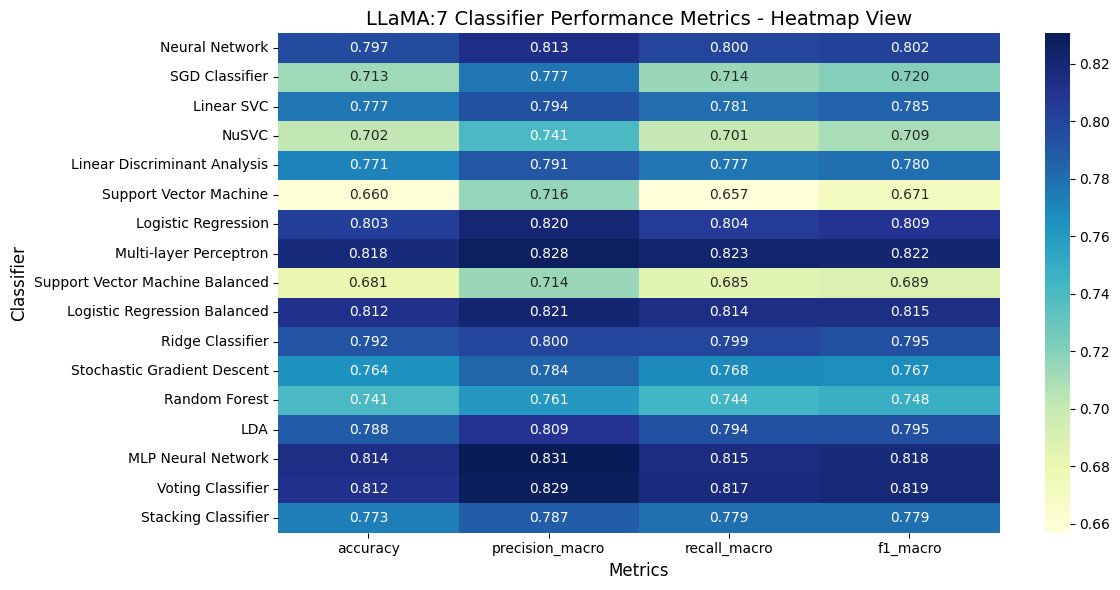

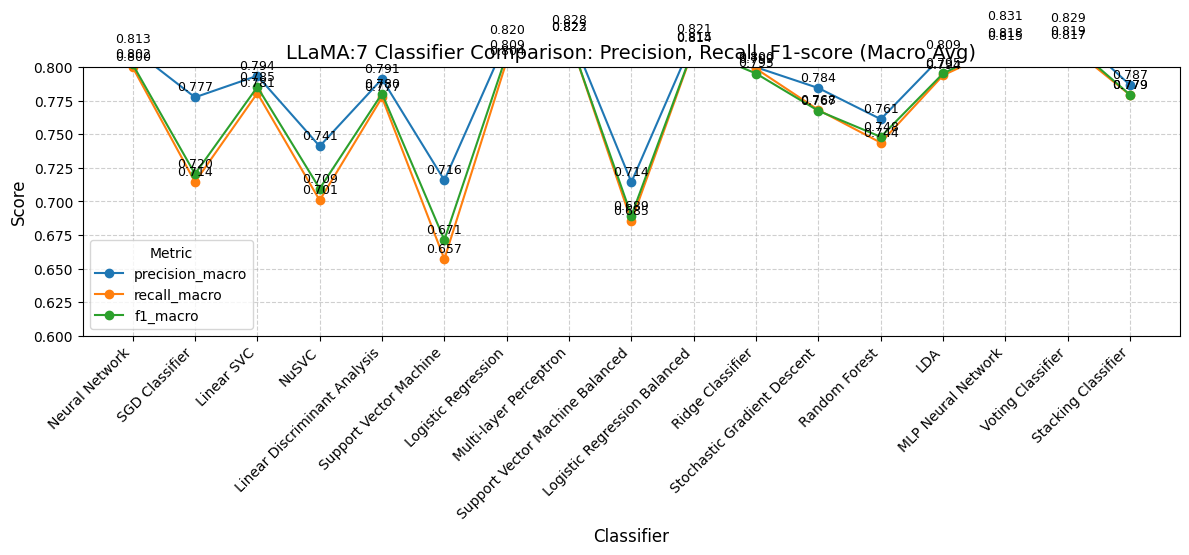

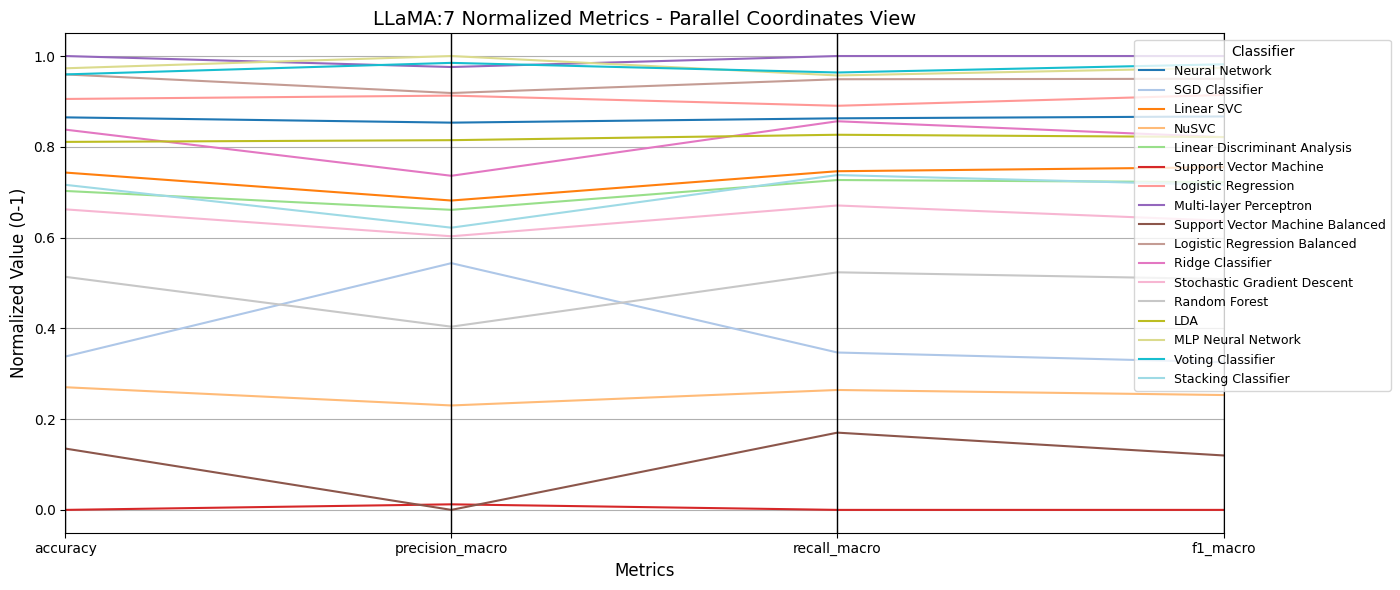

In [ ]:
visualize_metrics(metrics_7, '/content/drive/MyDrive/Colab_/Artical 2_Version2/plots/RES1', 'LLaMA:7')


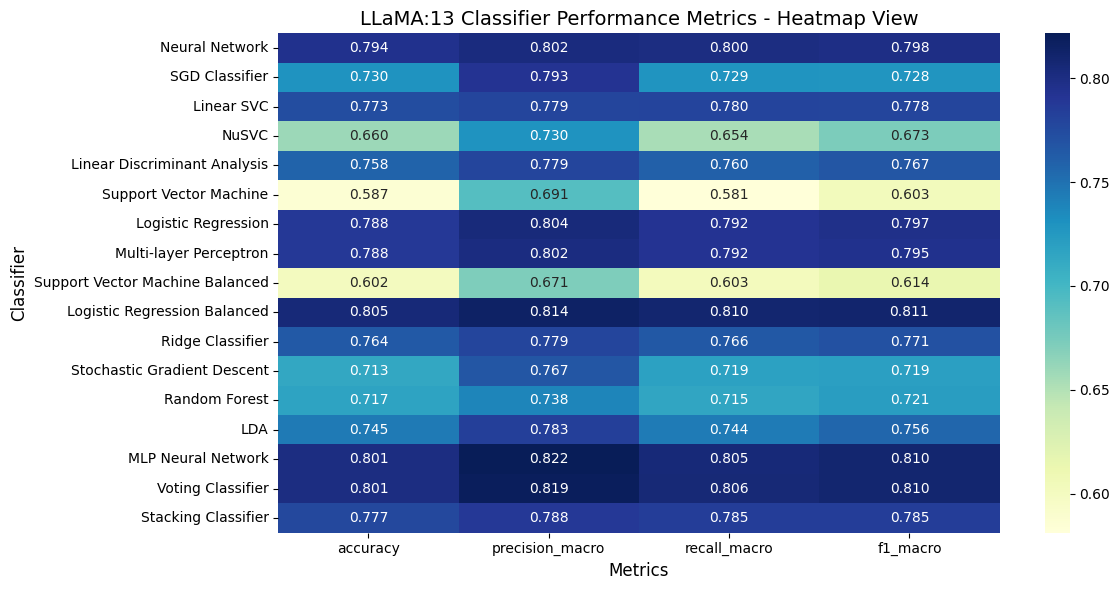

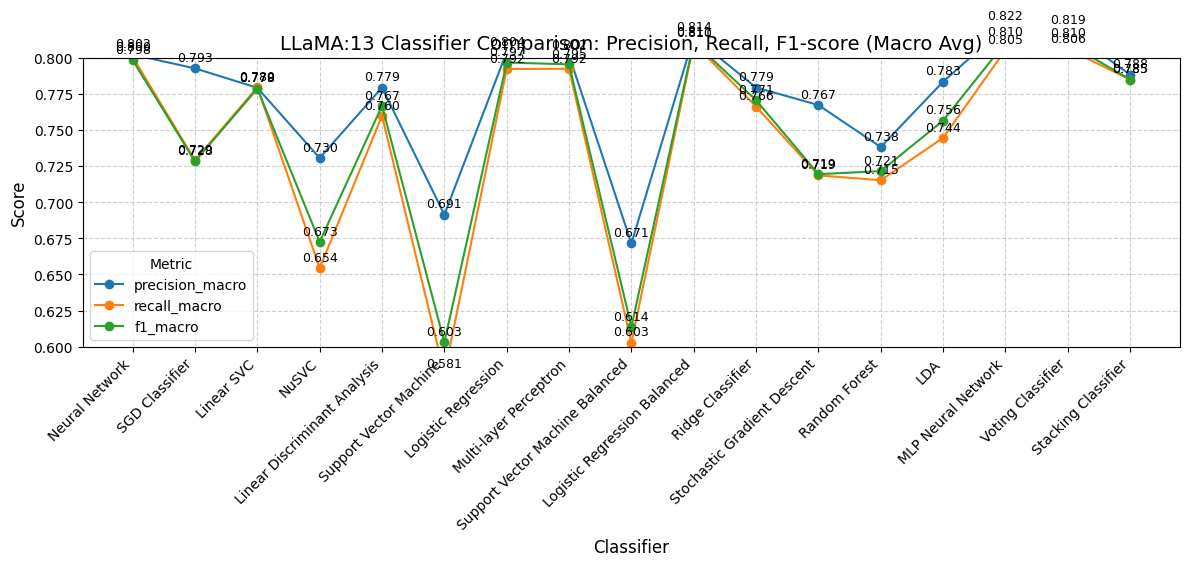

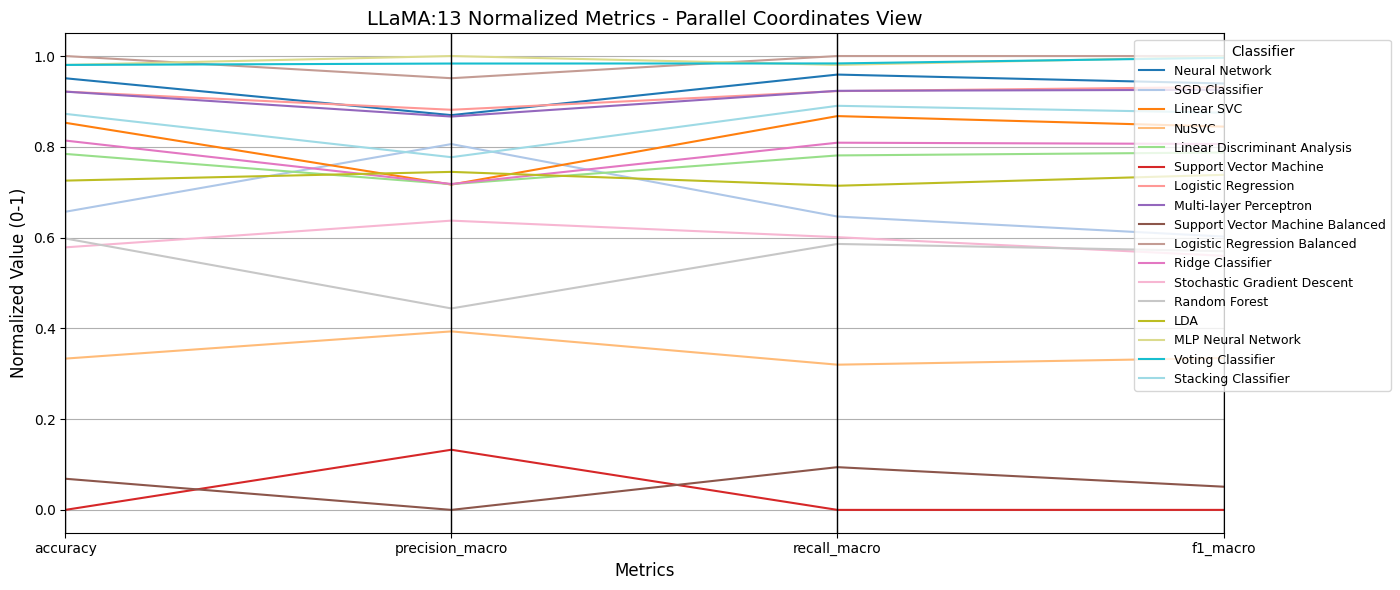

In [ ]:
visualize_metrics(metrics_13, '/content/drive/MyDrive/Colab_/Artical 2_Version2/plots/RES1', 'LLaMA:13')


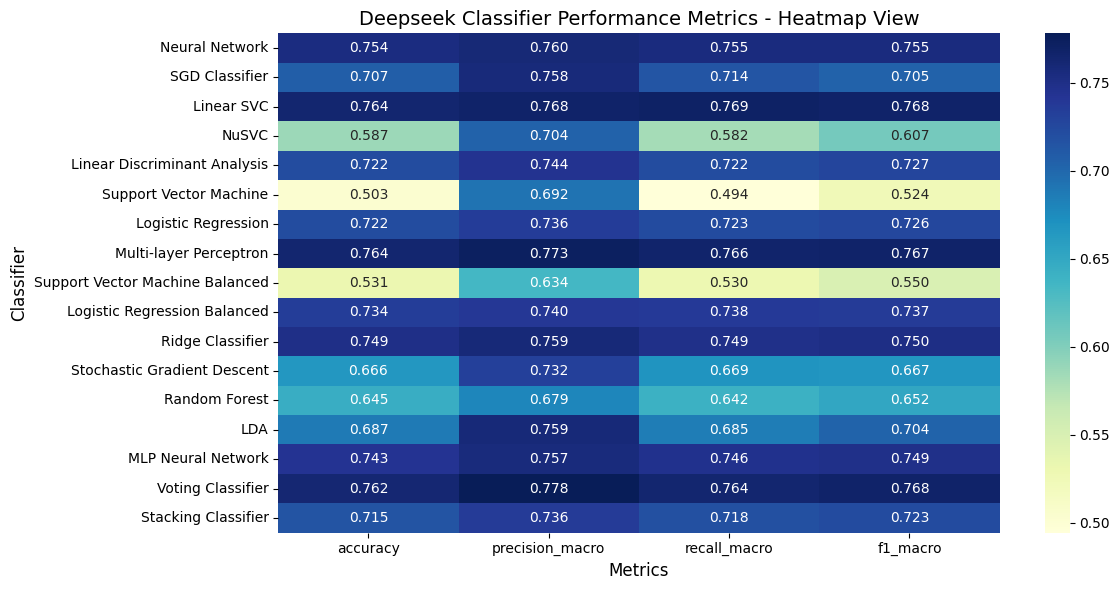

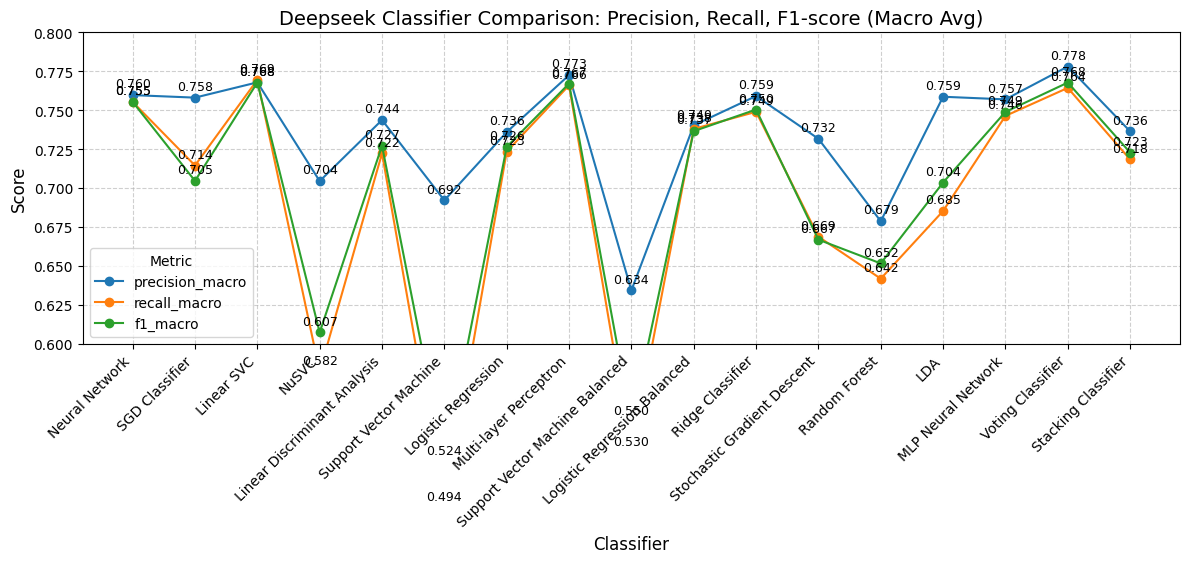

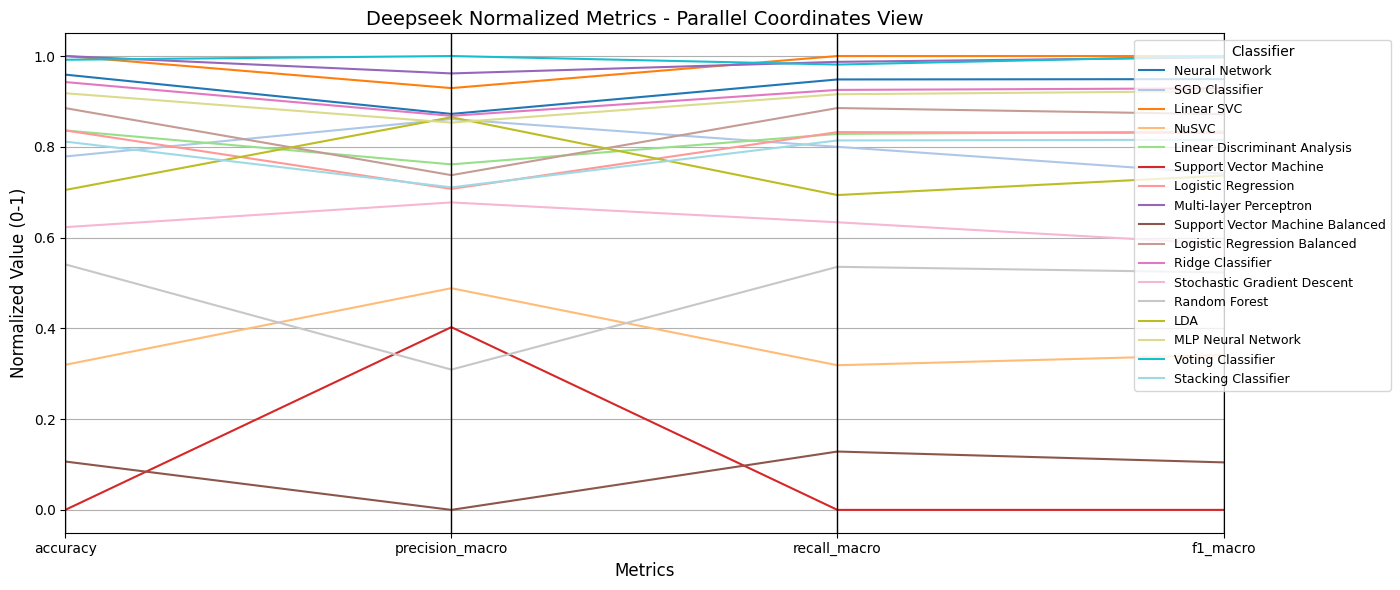

In [ ]:
visualize_metrics(metrics_DS, '/content/drive/MyDrive/Colab_/Artical 2_Version2/plots/RES1', 'Deepseek')


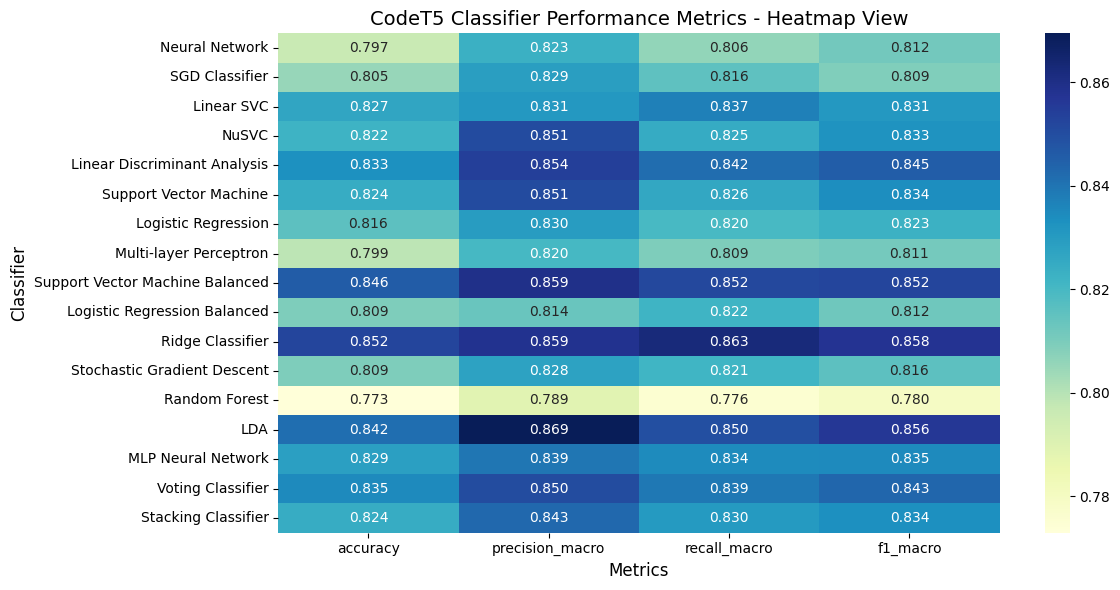

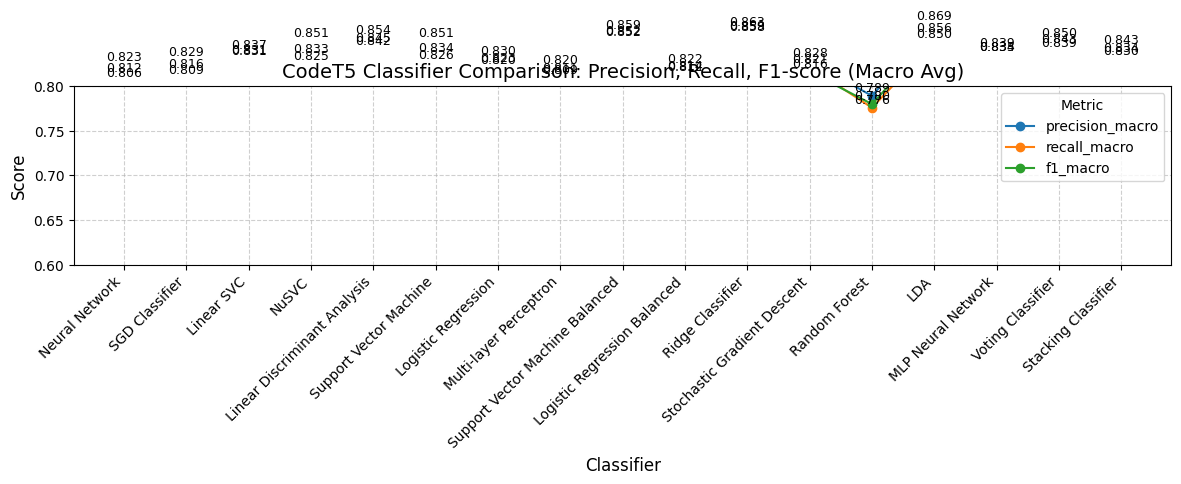

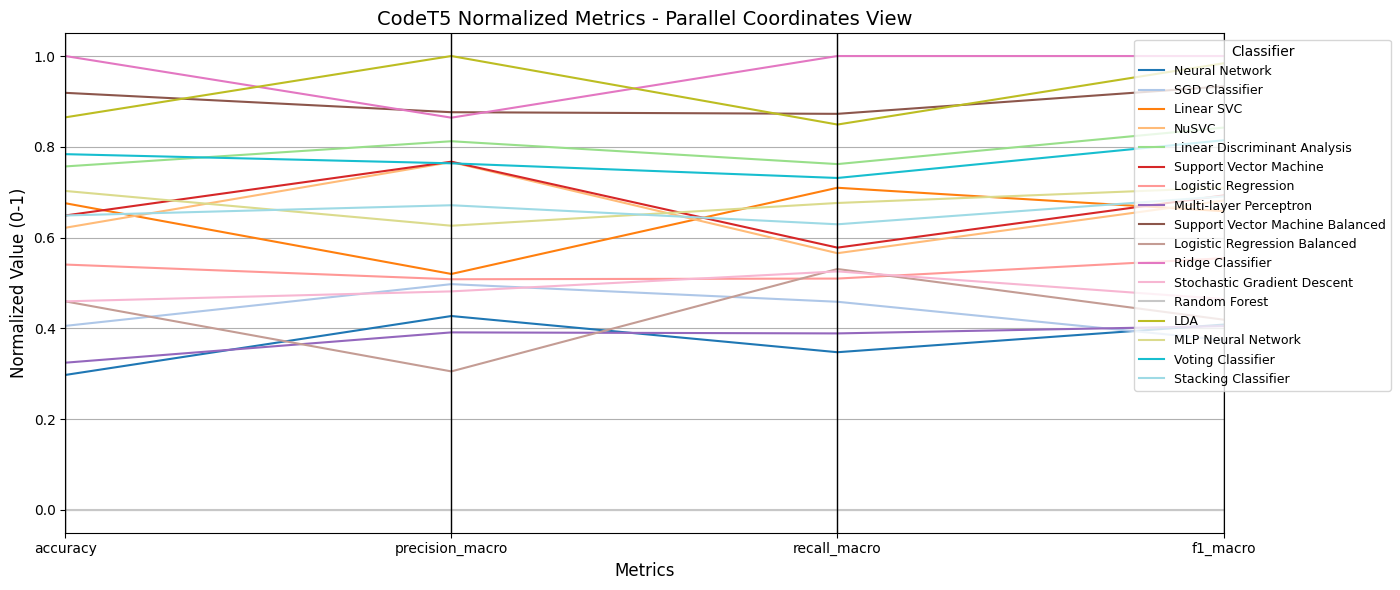

In [ ]:
visualize_metrics(metrics_5t, '/content/drive/MyDrive/Colab_/Artical 2_Version2/plots/RES1', 'CodeT5')


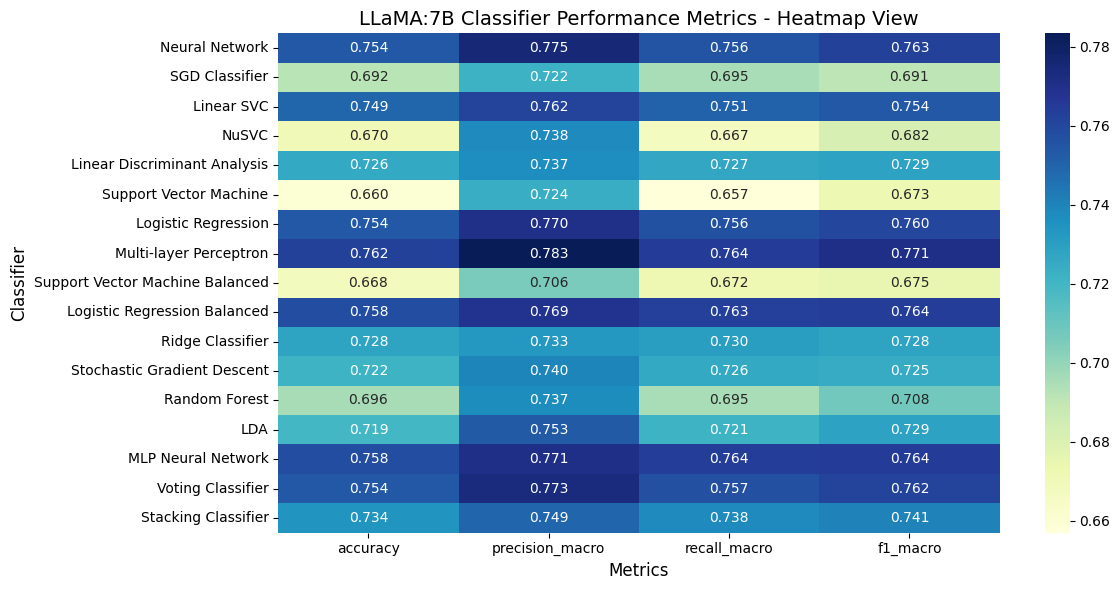

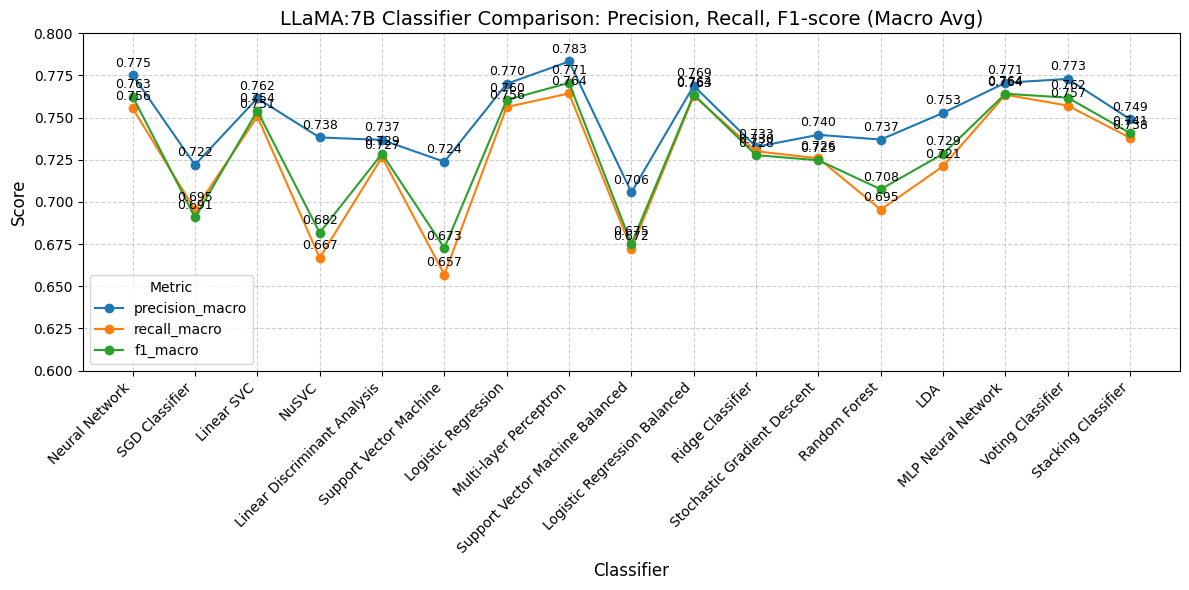

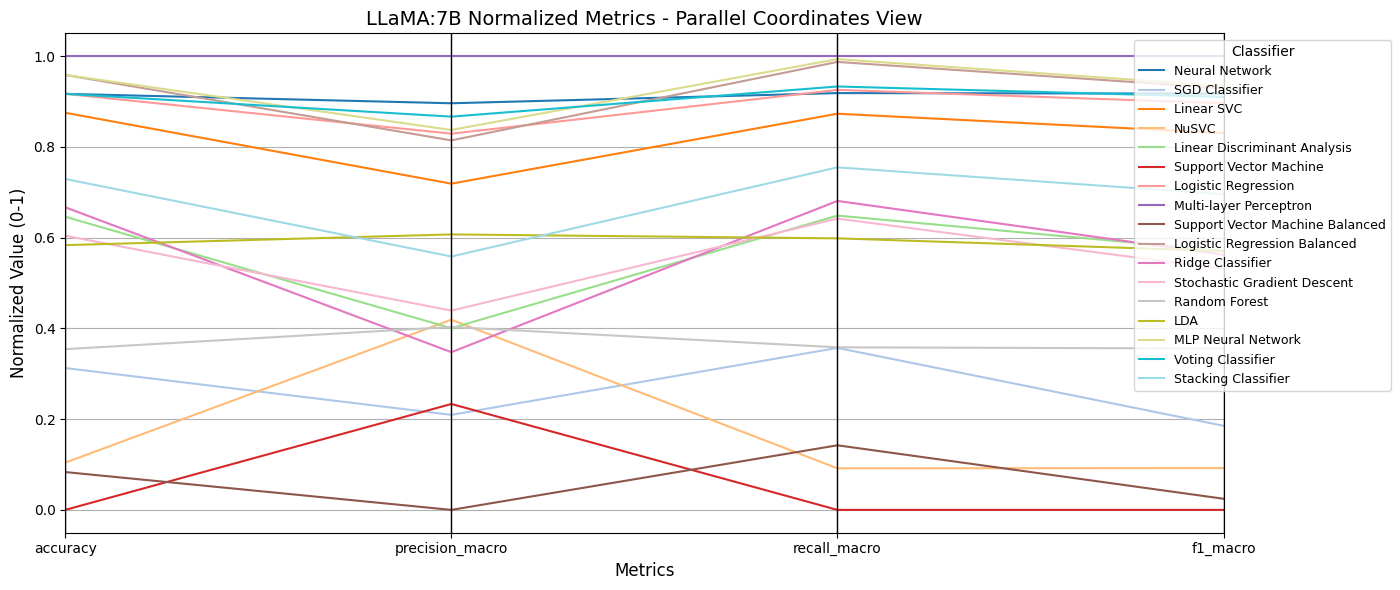

In [ ]:
visualize_metrics(metrics_7, '/content/drive/MyDrive/Colab_/Artical 2_Version2', 'LLaMA:7B')


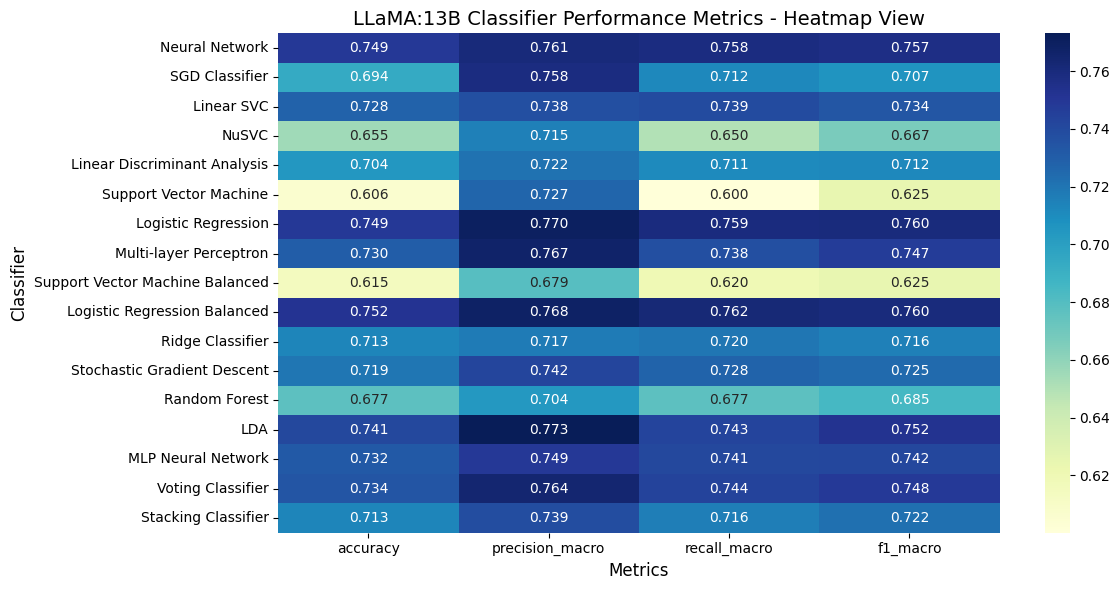

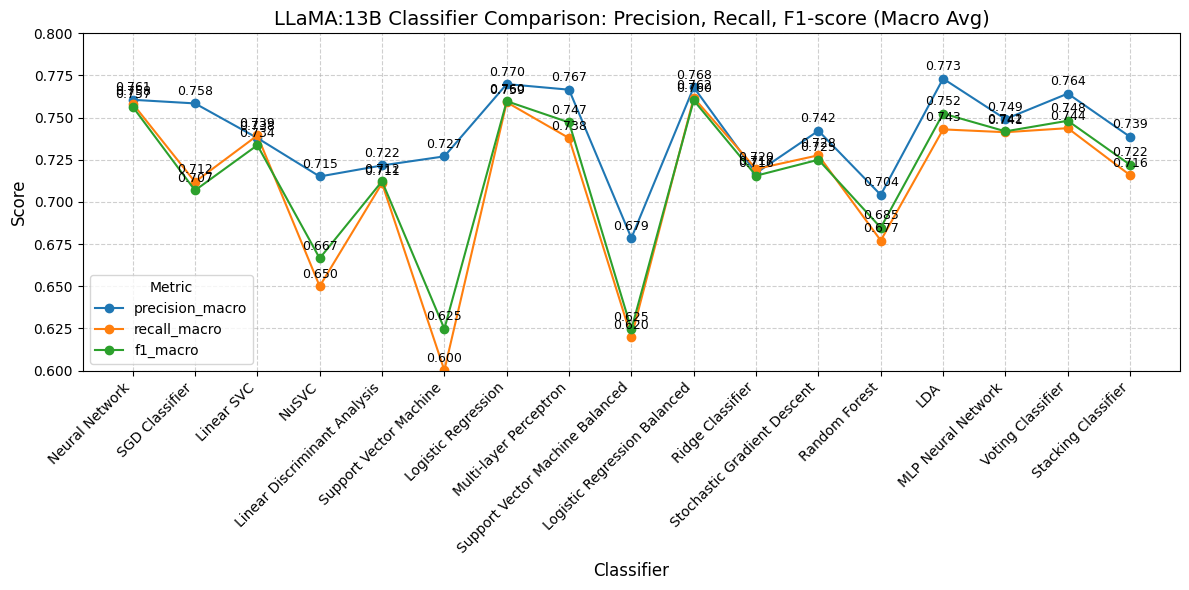

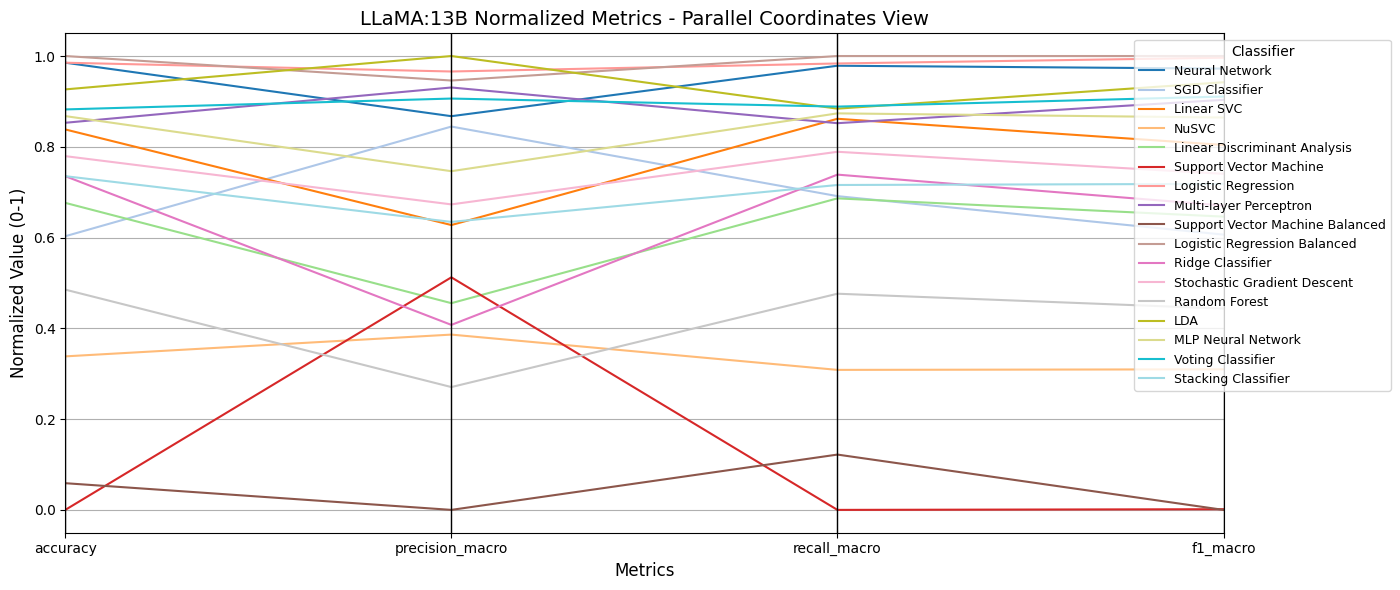

In [ ]:
visualize_metrics(metrics_13, '/content/drive/MyDrive/Colab_/Artical 2_Version2', 'LLaMA:13B')


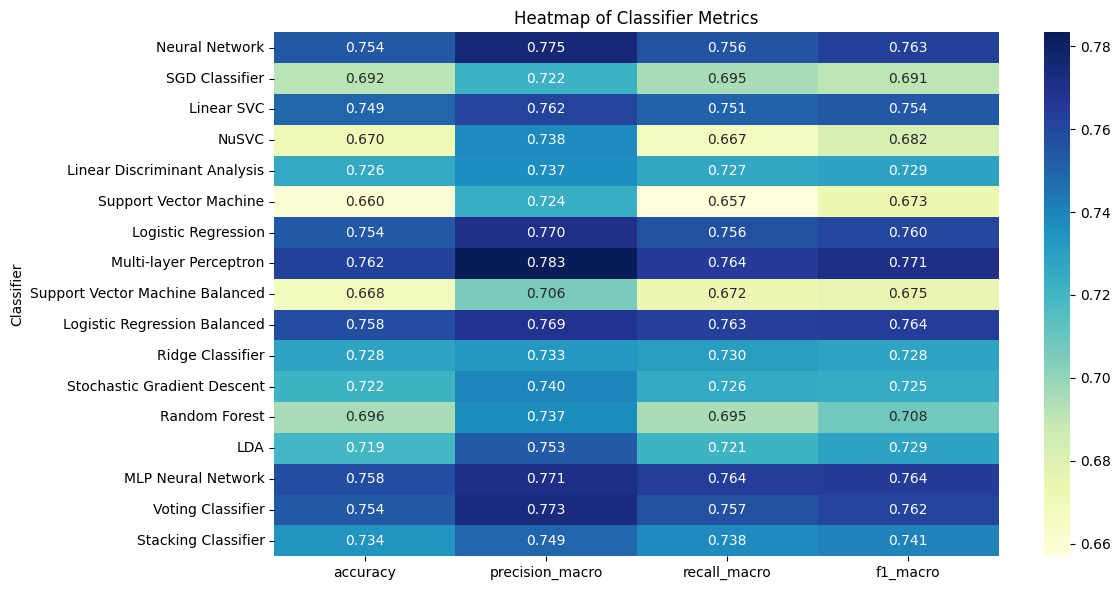

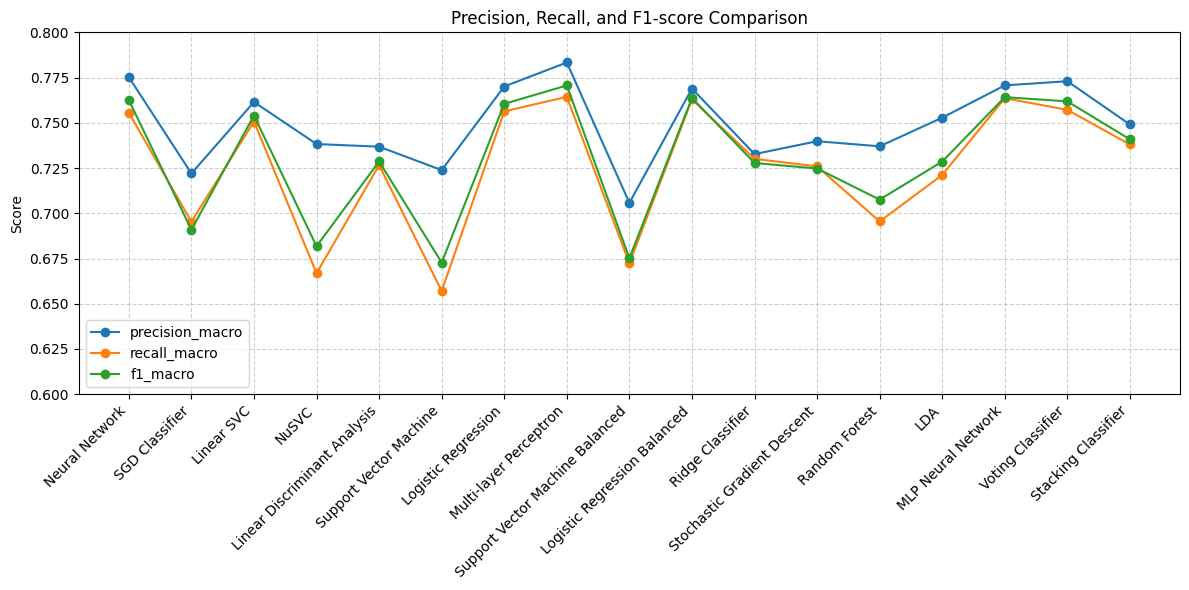

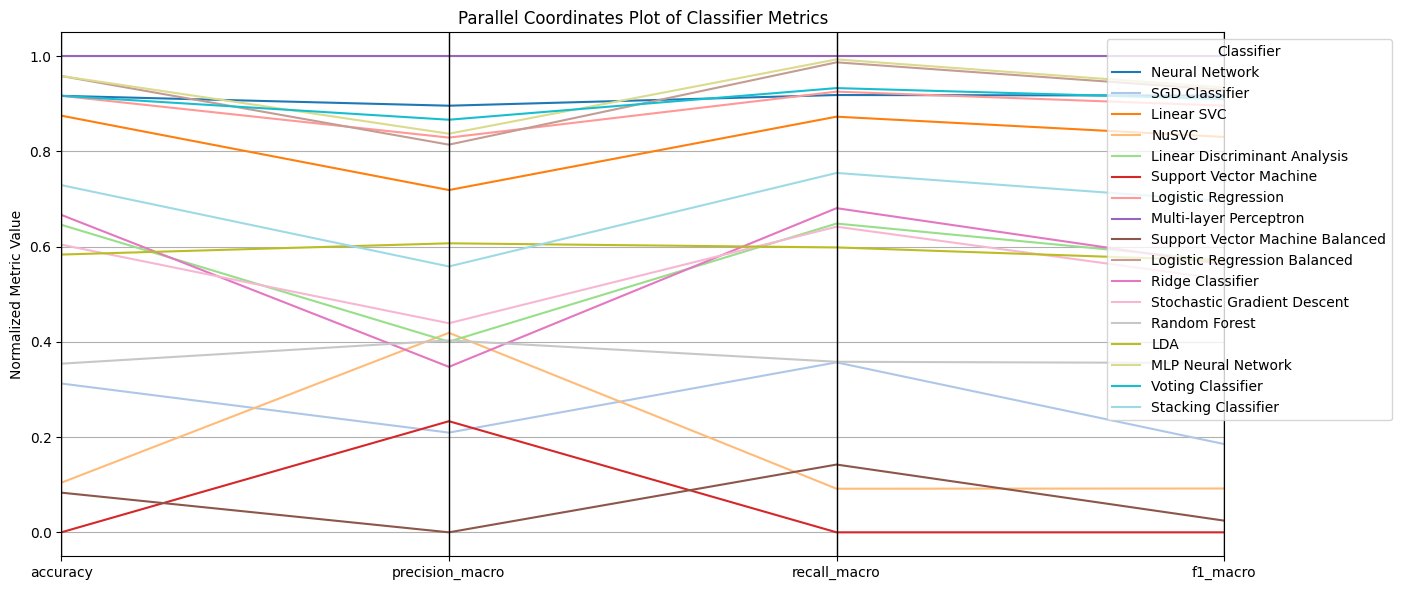

In [ ]:
visualize_metrics(metrics_7, '/content/drive/MyDrive/Colab_/Artical 2_Version2')


***PART2***

In [ ]:
category_labels = ['Creational', 'Structural', 'Behavioral', 'Non-GoF']

int_to_pattern = {
    0: 'AbstractFactory', 1: 'Unknown', 2: 'Facade', 3: 'Adapter', 4: 'Memento',
    5: 'Singleton', 6: 'Proxy', 7: 'Prototype', 8: 'Observer', 9: 'Decorator',
    10: 'FactoryMethod', 11: 'Builder', 12: 'Visitor', 13: 'Strategy'
}

pattern_to_category = {
    'AbstractFactory': 'Creational',
    'Builder': 'Creational',
    'FactoryMethod': 'Creational',
    'Prototype': 'Creational',
    'Singleton': 'Creational',
    'Adapter': 'Structural',
    'Decorator': 'Structural',
    'Facade': 'Structural',
    'Proxy': 'Structural',
    'Composite': 'Structural',
    'Bridge': 'Structural',
    'Flyweight': 'Structural',
    'ChainOfResponsibility': 'Behavioral',
    'Command': 'Behavioral',
    'Interpreter': 'Behavioral',
    'Iterator': 'Behavioral',
    'Mediator': 'Behavioral',
    'Memento': 'Behavioral',
    'Observer': 'Behavioral',
    'State': 'Behavioral',
    'Strategy': 'Behavioral',
    'TemplateMethod': 'Behavioral',
    'Visitor': 'Behavioral',
    'Unknown': 'Non-GoF'
}


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

def evaluate_category_classification_to_csv(y_test, metrics_dict, int_to_pattern, pattern_to_category, category_labels):
    """
    Evaluates classification performance per category and saves results in a DataFrame.

    Returns:
        pd.DataFrame: Combined classification results for all classifiers.
    """
    # Convert y_test indices to pattern and then category
    y_test_patterns = [int_to_pattern[i] for i in y_test]
    y_test_category = [pattern_to_category.get(label, 'Unknown') for label in y_test_patterns]

    all_results = []

    for classifier_name, metrics in metrics_dict.items():
        y_pred = metrics['y_pred']
        y_pred_patterns = [int_to_pattern[i] for i in y_pred]
        y_pred_category = [pattern_to_category.get(label, 'Unknown') for label in y_pred_patterns]

        report = classification_report(
            y_test_category,
            y_pred_category,
            labels=category_labels,
            target_names=category_labels,
            zero_division=0,
            output_dict=True
        )

        for category in category_labels:
            category_metrics = report.get(category, {})
            all_results.append({
                'Classifier': classifier_name,
                'Category': category,
                'Precision': category_metrics.get('precision', 0),
                'Recall': category_metrics.get('recall', 0),
                'F1-score': category_metrics.get('f1-score', 0),
                'Support': category_metrics.get('support', 0)
            })

    df_results = pd.DataFrame(all_results)
    return df_results


In [ ]:
# Run evaluation and get results
df_category_metrics = evaluate_category_classification_to_csv(
    y_test_7, metrics_7, int_to_pattern, pattern_to_category, category_labels
)

# Save to CSV
df_category_metrics.to_csv("category_classification_report_7.csv", index=False)


In [ ]:
# Run evaluation and get results
df_category_metrics = evaluate_category_classification_to_csv(
    y_test_5t, metrics_5t, int_to_pattern, pattern_to_category, category_labels
)

# Save to CSV
df_category_metrics.to_csv("category_classification_report_5t.csv", index=False)

In [ ]:
# Run evaluation and get results
df_category_metrics = evaluate_category_classification_to_csv(
    y_test_DS, metrics_DS, int_to_pattern, pattern_to_category, category_labels
)

# Save to CSV
df_category_metrics.to_csv("category_classification_report_DS.csv", index=False)

In [ ]:
# Run evaluation and get results
df_category_metrics = evaluate_category_classification_to_csv(
    y_test_13, metrics_13, int_to_pattern, pattern_to_category, category_labels
)

# Save to CSV
df_category_metrics.to_csv("category_classification_report_13.csv", index=False)

# Display (optional)
df_category_metrics.head()


Classifier    Category  Precision    Recall  F1-score  Support
0  Neural Network  Creational   0.811765  0.836364  0.823881    165.0
1  Neural Network  Structural   0.851852  0.747967  0.796537    123.0
2  Neural Network  Behavioral   0.789809  0.843537  0.815789    147.0
3  Neural Network     Non-GoF   0.750000  0.750000  0.750000     32.0
4  SGD Classifier  Creational   0.869565  0.727273  0.792079    165.0

In [ ]:
data_5t.head()

Directory                    File          Pattern  Feature_0  Feature_1  \
0       111         AbstractFactory  AbstractFactory   0.023346  -0.059852   
1       111       DPAbstractFactory          Unknown  -0.010441  -0.057699   
2       111    FactoryNotebookGamer  AbstractFactory  -0.024173  -0.085740   
3       111  FactoryNotebookOfficeW          Unknown  -0.009756  -0.040580   
4       111         FactoryProvider  AbstractFactory  -0.053560  -0.034661   

   Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  ...  Feature_291  \
0  -0.046176  -0.097405  -0.044382  -0.012018  -0.005196  ...    -0.044441   
1  -0.043226  -0.051360  -0.076978  -0.026927  -0.028718  ...    -0.098888   
2  -0.110586  -0.093645  -0.067076  -0.074021  -0.015681  ...    -0.066261   
3  -0.070110  -0.109534  -0.032864  -0.052202   0.030639  ...    -0.119599   
4  -0.000312  -0.008642  -0.062671  -0.077100  -0.033547  ...    -0.104436   

   Feature_292  Feature_293  Feature_294  Feature_295  Feature_296  \
0    -0.052856     0.090196     0.121308     0.013891    -0.010730   
1    -0.042778     0.084722     0.167180     0.040148    -0.095231   
2    -0.011634     0.030901     0.066849     0.049524    -0.031129   
3    -0.025784     0.095495     0.114170    -0.024063    -0.038113   
4     0.016781     0.051911     0.097571     0.003386    -0.081571   

   Feature_297  Feature_298  Feature_299  pattern_encoded  
0    -0.110684     0.001927    -0.065017                0  
1    -0.020824    -0.011934    -0.075166               12  
2    -0.088362     0.020524    -0.123357                0  
3    -0.122671     0.016256    -0.132930               12  
4    -0.085006    -0.018682    -0.095018                0  

[5 rows x 304 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def train_category_classifier(df, sep: str = "\t") -> str:
    # 1. Load dataset
    #df = pd.read_csv(file_path, sep=sep)

    # 2. Define mapping from pattern name to category
    pattern_to_category = {
    "AbstractFactory": "Creational",
    "Builder": "Creational",
    "FactoryMethod": "Creational",
    "Prototype": "Creational",
    "Singleton": "Creational",

    "Adapter": "Structural",
    "Decorator": "Structural",
    "Facade": "Structural",
    "Proxy": "Structural",

    "Observer": "Behavioral",
    "Strategy": "Behavioral",
    "Memento": "Behavioral",
    "Visitor": "Behavioral",

    "Unknown": "Unknown"
}



    # 3. Add category column
    df["Pattern_Category"] = df["Pattern"].map(pattern_to_category).fillna("Unknown")

    # 4. Extract features and target
    feature_cols = [f"Feature_{i}" for i in range(300)]
    X = df[feature_cols]
    y = df["Pattern_Category"]

    # 5. Encode target labels
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # 6. Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # 7. Train classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # 8. Return report
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    return report


In [ ]:
Best_classifiers

{'Neural Network': MLPClassifier(max_iter=1000),
 'SGD Classifier': SGDClassifier(class_weight='balanced'),
 'Linear SVC': LinearSVC(class_weight='balanced'),
 'NuSVC': NuSVC(class_weight='balanced'),
 'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
 'Support Vector Machine': SVC(),
 'Logistic Regression': LogisticRegression(),
 'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
 'Support Vector Machine Balanced': SVC(class_weight='balanced'),
 'Logistic Regression Balanced': LogisticRegression(class_weight='balanced'),
 'Ridge Classifier': RidgeClassifier(),
 'Stochastic Gradient Descent': SGDClassifier(class_weight='balanced'),
 'Random Forest': RandomForestClassifier(class_weight='balanced'),
 'LDA': LinearDiscriminantAnalysis(shrinkage=0.2, solver='lsqr'),
 'MLP Neural Network': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier',
                  MLPClassifier(max_iter=500, random_state=42))]),
 'Voting Classifier': VotingCla

In [ ]:
data_5t

Directory                    File          Pattern  Feature_0  \
0             111         AbstractFactory  AbstractFactory   0.023346   
1             111       DPAbstractFactory          Unknown  -0.010441   
2             111    FactoryNotebookGamer  AbstractFactory  -0.024173   
3             111  FactoryNotebookOfficeW          Unknown  -0.009756   
4             111         FactoryProvider  AbstractFactory  -0.053560   
...           ...                     ...              ...        ...   
1549  zen-project               Prototype        Prototype  -0.016787   
1550  zen-project      SingletonSolrAware        Singleton  -0.002233   
1551  zen-project                       v  AbstractFactory  -0.008570   
1552  zen-project                       w  AbstractFactory   0.027069   
1553  zen-project                       x  AbstractFactory  -0.013931   

      Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  ...  \
0     -0.059852  -0.046176  -0.097405  -0.044382  -0.012018  -0.005196  ...   
1     -0.057699  -0.043226  -0.051360  -0.076978  -0.026927  -0.028718  ...   
2     -0.085740  -0.110586  -0.093645  -0.067076  -0.074021  -0.015681  ...   
3     -0.040580  -0.070110  -0.109534  -0.032864  -0.052202   0.030639  ...   
4     -0.034661  -0.000312  -0.008642  -0.062671  -0.077100  -0.033547  ...   
...         ...        ...        ...        ...        ...        ...  ...   
1549  -0.012379  -0.030543  -0.044689  -0.057575  -0.068799  -0.049090  ...   
1550   0.009756  -0.001063  -0.103230  -0.057895   0.063453  -0.147432  ...   
1551  -0.030368  -0.171252  -0.004196   0.002323   0.016001  -0.012020  ...   
1552  -0.033211  -0.032007   0.006123   0.009697  -0.018647  -0.071895  ...   
1553   0.017277  -0.036979   0.013894  -0.016541  -0.033658  -0.024544  ...   

      Feature_291  Feature_292  Feature_293  Feature_294  Feature_295  \
0       -0.044441    -0.052856     0.090196     0.121308     0.013891   
1       -0.098888    -0.042778     0.084722     0.167180     0.040148   
2       -0.066261    -0.011634     0.030901     0.066849     0.049524   
3       -0.119599    -0.025784     0.095495     0.114170    -0.024063   
4       -0.104436     0.016781     0.051911     0.097571     0.003386   
...           ...          ...          ...          ...          ...   
1549    -0.115009    -0.047006    -0.026964     0.008524    -0.061921   
1550    -0.094820    -0.052343     0.011021     0.077791     0.093602   
1551     0.025394     0.029738     0.056498     0.018256    -0.020902   
1552     0.018491     0.010421     0.087490     0.028051     0.063027   
1553    -0.021989     0.027391     0.069153     0.035038    -0.023415   

      Feature_296  Feature_297  Feature_298  Feature_299  pattern_encoded  
0       -0.010730    -0.110684     0.001927    -0.065017                0  
1       -0.095231    -0.020824    -0.011934    -0.075166               12  
2       -0.031129    -0.088362     0.020524    -0.123357                0  
3       -0.038113    -0.122671     0.016256    -0.132930               12  
4       -0.081571    -0.085006    -0.018682    -0.095018                0  
...           ...          ...          ...          ...              ...  
1549    -0.083914    -0.020484    -0.033197    -0.152245                8  
1550     0.000575     0.004974     0.025744     0.094919               10  
1551    -0.001200    -0.032696    -0.056141     0.017458                0  
1552     0.056816     0.024625    -0.025866     0.026720                0  
1553    -0.027360    -0.075623     0.058826    -0.001003                0  

[1554 rows x 304 columns]

In [ ]:
report = train_category_classifier(data_5t)
print("Dataset 1 Report:\n", report)

Dataset 1 Report:
               precision    recall  f1-score   support

  Behavioral       0.80      0.84      0.82        88
  Creational       0.79      0.90      0.84       115
  Structural       0.82      0.82      0.82        74
     Unknown       0.54      0.21      0.30        34

    accuracy                           0.79       311
   macro avg       0.74      0.69      0.70       311
weighted avg       0.77      0.79      0.77       311



**the TARGET is the Category**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

def train_category_classifier_and_save_results(df, output_csv: str, sep: str = "\t") -> pd.DataFrame:
    # Load dataset

    # Updated pattern-to-category mapping
    pattern_to_category = {
        "AbstractFactory": "Creational",
        "Builder": "Creational",
        "FactoryMethod": "Creational",
        "Prototype": "Creational",
        "Singleton": "Creational",
        "Adapter": "Structural",
        "Decorator": "Structural",
        "Facade": "Structural",
        "Proxy": "Structural",
        "Observer": "Behavioral",
        "Strategy": "Behavioral",
        "Memento": "Behavioral",
        "Visitor": "Behavioral",
        "Unknown": "Unknown"
    }

    # Add category column
    df["Pattern_Category"] = df["Pattern"].map(pattern_to_category).fillna("Unknown")

    # Extract features and target
    feature_cols = [f"Feature_{i}" for i in range(300)]
    X = df[feature_cols]
    y = df["Pattern_Category"]

    # Encode target
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define best classifiers
    best_classifiers = Best_classifiers

    # Collect metrics
    results = []

    for name, model in best_classifiers.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

            # Add macro and weighted avg metrics
            results.append({
                "Classifier": name,
                "Macro Precision": report["macro avg"]["precision"],
                "Macro Recall": report["macro avg"]["recall"],
                "Macro F1-score": report["macro avg"]["f1-score"],
                "Weighted Precision": report["weighted avg"]["precision"],
                "Weighted Recall": report["weighted avg"]["recall"],
                "Weighted F1-score": report["weighted avg"]["f1-score"]
            })
        except Exception as e:
            results.append({
                "Classifier": name,
                "Macro Precision": None,
                "Macro Recall": None,
                "Macro F1-score": None,
                "Weighted Precision": None,
                "Weighted Recall": None,
                "Weighted F1-score": None,
                "Error": str(e)
            })

    # Save to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)

    return results_df


In [ ]:
df_results = train_category_classifier_and_save_results(
    data_5t,
    output_csv="/content/drive/MyDrive/Colab_/EXP2/results_summary_exp2_T5.csv"
)


# **HERE ISHOULD REPEAT FOR ALL DATASETS**
LATER

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

def train_pattern_name_with_category(df: pd.DataFrame, output_csv: str) -> pd.DataFrame:
    # Updated pattern-to-category mapping
    pattern_to_category = {
        "AbstractFactory": "Creational",
        "Builder": "Creational",
        "FactoryMethod": "Creational",
        "Prototype": "Creational",
        "Singleton": "Creational",
        "Adapter": "Structural",
        "Decorator": "Structural",
        "Facade": "Structural",
        "Proxy": "Structural",
        "Observer": "Behavioral",
        "Strategy": "Behavioral",
        "Memento": "Behavioral",
        "Visitor": "Behavioral",
        "Unknown": "Unknown"
    }

    # Add category column
    df["Pattern_Category"] = df["Pattern"].map(pattern_to_category).fillna("Unknown")

    # Encode Pattern_Category (feature)
    le_cat = LabelEncoder()
    df["Pattern_Category_Encoded"] = le_cat.fit_transform(df["Pattern_Category"])

    # Features: original numeric + encoded category
    feature_cols = [f"Feature_{i}" for i in range(300)] + ["Pattern_Category_Encoded"]
    X = df[feature_cols]

    # Target: Pattern name, encoded
    le_pattern = LabelEncoder()
    y = le_pattern.fit_transform(df["Pattern"])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Best classifiers dictionary (تأكد تعرفها خارج الدالة أو أدخلها كـ parameter)
    best_classifiers = Best_classifiers

    # Collect metrics

    results = []

    for name, model in best_classifiers.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=le_pattern.classes_, output_dict=True)

            results.append({
                "Classifier": name,
                "Macro Precision": report["macro avg"]["precision"],
                "Macro Recall": report["macro avg"]["recall"],
                "Macro F1-score": report["macro avg"]["f1-score"],
                "Weighted Precision": report["weighted avg"]["precision"],
                "Weighted Recall": report["weighted avg"]["recall"],
                "Weighted F1-score": report["weighted avg"]["f1-score"]
            })
        except Exception as e:
            results.append({
                "Classifier": name,
                "Macro Precision": None,
                "Macro Recall": None,
                "Macro F1-score": None,
                "Weighted Precision": None,
                "Weighted Recall": None,
                "Weighted F1-score": None,
                "Error": str(e)
            })

    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)

    return results_df


In [ ]:
df_results = train_category_classifier_and_save_results(
    data_DS,
    output_csv="/content/drive/MyDrive/Colab_/EXP2/EXP3/results_summary_exp2_DS.csv"
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

def train_pattern_name_with_category_per_class(df: pd.DataFrame, output_csv: str) -> pd.DataFrame:
    pattern_to_category = {
        "AbstractFactory": "Creational",
        "Builder": "Creational",
        "FactoryMethod": "Creational",
        "Prototype": "Creational",
        "Singleton": "Creational",
        "Adapter": "Structural",
        "Decorator": "Structural",
        "Facade": "Structural",
        "Proxy": "Structural",
        "Observer": "Behavioral",
        "Strategy": "Behavioral",
        "Memento": "Behavioral",
        "Visitor": "Behavioral",
        "Unknown": "Unknown"
    }

    # Add category column
    df["Pattern_Category"] = df["Pattern"].map(pattern_to_category).fillna("Unknown")

    # Encode category feature
    le_cat = LabelEncoder()
    df["Pattern_Category_Encoded"] = le_cat.fit_transform(df["Pattern_Category"])

    feature_cols = [f"Feature_{i}" for i in range(300)] + ["Pattern_Category_Encoded"]
    X = df[feature_cols]

    # Encode target (Pattern)
    le_pattern = LabelEncoder()
    y = le_pattern.fit_transform(df["Pattern"])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_classifiers = Best_classifiers  # تأكد تعرفها في مكان ما

    results = []

    for name, model in best_classifiers.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=le_pattern.classes_, output_dict=True)

            # بيانات الأداء لكل فئة
            per_class_metrics = {}
            for cls in le_pattern.classes_:
                per_class_metrics[f"{cls} Precision"] = report[cls]["precision"]
                per_class_metrics[f"{cls} Recall"] = report[cls]["recall"]
                per_class_metrics[f"{cls} F1-score"] = report[cls]["f1-score"]

            results.append({
                "Classifier": name,
                "Macro Precision": report["macro avg"]["precision"],
                "Macro Recall": report["macro avg"]["recall"],
                "Macro F1-score": report["macro avg"]["f1-score"],
                "Weighted Precision": report["weighted avg"]["precision"],
                "Weighted Recall": report["weighted avg"]["recall"],
                "Weighted F1-score": report["weighted avg"]["f1-score"],
                **per_class_metrics
            })
        except Exception as e:
            results.append({
                "Classifier": name,
                "Macro Precision": None,
                "Macro Recall": None,
                "Macro F1-score": None,
                "Weighted Precision": None,
                "Weighted Recall": None,
                "Weighted F1-score": None,
                "Error": str(e)
            })

    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)

    return results_df


In [ ]:
df_results = train_pattern_name_with_category_per_class(
    data_DS,
    output_csv="/content/drive/MyDrive/Colab_/EXP2/EXP3/results_summary_exp2_DS_perClass.csv"
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
df_results

Classifier  Macro Precision  Macro Recall  \
0                    Neural Network         0.895371      0.894897   
1                    SGD Classifier         0.841347      0.818258   
2                        Linear SVC         0.885115      0.878984   
3                             NuSVC         0.821363      0.790194   
4      Linear Discriminant Analysis         0.783806      0.747647   
5            Support Vector Machine         0.772125      0.736587   
6               Logistic Regression         0.883164      0.876291   
7            Multi-layer Perceptron         0.885940      0.883162   
8   Support Vector Machine Balanced         0.785213      0.751571   
9      Logistic Regression Balanced         0.882828      0.877437   
10                 Ridge Classifier         0.845819      0.823979   
11      Stochastic Gradient Descent         0.849286      0.833373   
12                    Random Forest         0.817918      0.791180   
13                              LDA         0.889641      0.850073   
14               MLP Neural Network         0.818789      0.817777   
15                Voting Classifier         0.838422      0.831840   
16              Stacking Classifier         0.829175      0.822472   

    Macro F1-score  Weighted Precision  Weighted Recall  Weighted F1-score  \
0         0.893551            0.908835         0.903537           0.904673   
1         0.815409            0.862252         0.832797           0.834241   
2         0.878503            0.898078         0.890675           0.891164   
3         0.794951            0.829654         0.810289           0.809471   
4         0.752626            0.779852         0.749196           0.752331   
5         0.740233            0.785945         0.765273           0.762113   
6         0.875650            0.895900         0.890675           0.889590   
7         0.881421            0.898858         0.893891           0.893527   
8         0.755594            0.798208         0.778135           0.776179   
9         0.876021            0.895593         0.890675           0.889401   
10        0.823508            0.856443         0.836013           0.835904   
11        0.831269            0.864282         0.848875           0.847355   
12        0.794231            0.819155         0.800643           0.798957   
13        0.851169            0.901956         0.868167           0.868408   
14        0.812506            0.829379         0.819936           0.818325   
15        0.829421            0.848467         0.836013           0.836519   
16        0.820988            0.836850         0.829582           0.828503   

    AbstractFactory Precision  AbstractFactory Recall  \
0                    0.840000                0.954545   
1                    1.000000                0.681818   
2                    0.913043                0.954545   
3                    0.772727                0.772727   
4                    1.000000                0.818182   
5                    0.809524                0.772727   
6                    0.875000                0.954545   
7                    0.875000                0.954545   
8                    0.809524                0.772727   
9                    0.880000                1.000000   
10                   1.000000                0.954545   
11                   0.937500                0.681818   
12                   0.947368                0.818182   
13                   0.947368                0.818182   
14                   0.913043                0.954545   
15                   0.863636                0.863636   
16                   0.800000                0.909091   

    AbstractFactory F1-score  ...  Singleton F1-score  Strategy Precision  \
0                   0.893617  ...            1.000000            1.000000   
1                   0.810811  ...            0.977778            1.000000   
2                   0.933333  ...            0.956522            1.000000   
3                   0.77

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

def train_category_with_pattern_as_feature(df: pd.DataFrame, output_csv: str) -> pd.DataFrame:
    pattern_to_category = {
        "AbstractFactory": "Creational",
        "Builder": "Creational",
        "FactoryMethod": "Creational",
        "Prototype": "Creational",
        "Singleton": "Creational",
        "Adapter": "Structural",
        "Decorator": "Structural",
        "Facade": "Structural",
        "Proxy": "Structural",
        "Observer": "Behavioral",
        "Strategy": "Behavioral",
        "Memento": "Behavioral",
        "Visitor": "Behavioral",
        "Unknown": "Unknown"
    }

    # إضافة عمود الفئة بناءً على النمط
    df["Pattern_Category"] = df["Pattern"].map(pattern_to_category).fillna("Unknown")

    # ترميز النمط (Feature)
    le_pattern = LabelEncoder()


    feature_cols = [f"Feature_{i}" for i in range(300)]
    X = df[feature_cols]

    # الهدف هو الفئة (Category) وترميزها
    le_cat = LabelEncoder()
    y = le_cat.fit_transform(df["Pattern_Category"])

    # تقسيم البيانات
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_classifiers = Best_classifiers  # تأكد من تعريفها

    results = []

    for name, model in best_classifiers.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=le_cat.classes_, output_dict=True)

            per_class_metrics = {}
            for cls in le_cat.classes_:
                per_class_metrics[f"{cls} Precision"] = report[cls]["precision"]
                per_class_metrics[f"{cls} Recall"] = report[cls]["recall"]
                per_class_metrics[f"{cls} F1-score"] = report[cls]["f1-score"]

            results.append({
                "Classifier": name,
                "Macro Precision": report["macro avg"]["precision"],
                "Macro Recall": report["macro avg"]["recall"],
                "Macro F1-score": report["macro avg"]["f1-score"],
                "Weighted Precision": report["weighted avg"]["precision"],
                "Weighted Recall": report["weighted avg"]["recall"],
                "Weighted F1-score": report["weighted avg"]["f1-score"],
                **per_class_metrics
            })
        except Exception as e:
            results.append({
                "Classifier": name,
                "Macro Precision": None,
                "Macro Recall": None,
                "Macro F1-score": None,
                "Weighted Precision": None,
                "Weighted Recall": None,
                "Weighted F1-score": None,
                "Error": str(e)
            })

    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)

    return results_df


In [ ]:
df_results = train_pattern_name_with_category_per_class(
    data_DS,
    output_csv="/content/drive/MyDrive/Colab_/EXP2/EXP3/results_summary_exp2_DS_perClass.csv"
)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
df_results

Classifier  Macro Precision  Macro Recall  \
0                    Neural Network         0.904512      0.899737   
1                    SGD Classifier         0.858543      0.828381   
2                        Linear SVC         0.885115      0.878984   
3                             NuSVC         0.821363      0.790194   
4      Linear Discriminant Analysis         0.783806      0.747647   
5            Support Vector Machine         0.772125      0.736587   
6               Logistic Regression         0.883164      0.876291   
7            Multi-layer Perceptron         0.890925      0.890935   
8   Support Vector Machine Balanced         0.785213      0.751571   
9      Logistic Regression Balanced         0.882828      0.877437   
10                 Ridge Classifier         0.845819      0.823979   
11      Stochastic Gradient Descent         0.846928      0.821901   
12                    Random Forest         0.802687      0.778527   
13                              LDA         0.889641      0.850073   
14               MLP Neural Network         0.818789      0.817777   
15                Voting Classifier         0.838422      0.831840   
16              Stacking Classifier         0.829175      0.822472   

    Macro F1-score  Weighted Precision  Weighted Recall  Weighted F1-score  \
0         0.899151            0.915268         0.909968           0.909903   
1         0.828057            0.871367         0.842444           0.843058   
2         0.878503            0.898078         0.890675           0.891164   
3         0.794951            0.829654         0.810289           0.809471   
4         0.752626            0.779852         0.749196           0.752331   
5         0.740233            0.785945         0.765273           0.762113   
6         0.875650            0.895900         0.890675           0.889590   
7         0.889692            0.905177         0.903537           0.903245   
8         0.755594            0.798208         0.778135           0.776179   
9         0.876021            0.895593         0.890675           0.889401   
10        0.823508            0.856443         0.836013           0.835904   
11        0.820945            0.861018         0.845659           0.841485   
12        0.780726            0.808195         0.790997           0.790027   
13        0.851169            0.901956         0.868167           0.868408   
14        0.812506            0.829379         0.819936           0.818325   
15        0.829421            0.848467         0.836013           0.836519   
16        0.820988            0.836850         0.829582           0.828503   

    AbstractFactory Precision  AbstractFactory Recall  \
0                    0.807692                0.954545   
1                    0.833333                0.909091   
2                    0.913043                0.954545   
3                    0.772727                0.772727   
4                    1.000000                0.818182   
5                    0.809524                0.772727   
6                    0.875000                0.954545   
7                    0.913043                0.954545   
8                    0.809524                0.772727   
9                    0.880000                1.000000   
10                   1.000000                0.954545   
11                   0.807692                0.954545   
12                   1.000000                0.772727   
13                   0.947368                0.818182   
14                   0.913043                0.954545   
15                   0.863636                0.863636   
16                   0.800000                0.909091   

    AbstractFactory F1-score  ...  Singleton F1-score  Strategy Precision  \
0                   0.875000  ...            1.000000            1.000000   
1                   0.869565  ...            0.977778            1.000000   
2                   0.933333  ...            0.956522            1.000000   
3                   0.77

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def train_category_classifier(df: pd.DataFrame, output_csv: str) -> pd.DataFrame:
    pattern_to_category = {
        "AbstractFactory": "Creational",
        "Builder": "Creational",
        "FactoryMethod": "Creational",
        "Prototype": "Creational",
        "Singleton": "Creational",
        "Adapter": "Structural",
        "Decorator": "Structural",
        "Facade": "Structural",
        "Proxy": "Structural",
        "Observer": "Behavioral",
        "Strategy": "Behavioral",
        "Memento": "Behavioral",
        "Visitor": "Behavioral",
        "Unknown": "Unknown"
    }

    # إضافة عمود الفئة
    df["Pattern_Category"] = df["Pattern"].map(pattern_to_category).fillna("Unknown")

    # الميزات: فقط الميزات الرقمية
    feature_cols = [f"Feature_{i}" for i in range(300)]
    X = df[feature_cols]

    # الهدف: فئة النمط
    le_cat = LabelEncoder()
    y = le_cat.fit_transform(df["Pattern_Category"])
    print(y)

    # تقسيم البيانات
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # تأكد أنك معرف Best_classifiers مسبقًا خارج الدالة
    best_classifiers = Best_classifiers

    results = []

    for name, model in best_classifiers.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            report = classification_report(y_test, y_pred, target_names=le_cat.classes_, output_dict=True)


            per_class_metrics = {}
            for cls in le_cat.classes_:
                per_class_metrics[f"{cls} Precision"] = report[cls]["precision"]
                per_class_metrics[f"{cls} Recall"] = report[cls]["recall"]
                per_class_metrics[f"{cls} F1-score"] = report[cls]["f1-score"]

            results.append({
                "Classifier": name,
                "Macro Precision": report["macro avg"]["precision"],
                "Macro Recall": report["macro avg"]["recall"],
                "Macro F1-score": report["macro avg"]["f1-score"],
                "Weighted Precision": report["weighted avg"]["precision"],
                "Weighted Recall": report["weighted avg"]["recall"],
                "Weighted F1-score": report["weighted avg"]["f1-score"],
                **per_class_metrics
            })
        except Exception as e:
            results.append({
                "Classifier": name,
                "Macro Precision": None,
                "Macro Recall": None,
                "Macro F1-score": None,
                "Weighted Precision": None,
                "Weighted Recall": None,
                "Weighted F1-score": None,
                "Error": str(e)
            })

    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)

    return results_df


In [ ]:
df_results = train_category_classifier(
    data_DS,
    output_csv="/content/drive/MyDrive/Colab_/EXP2/EXP3/results_summary_exp2_DS_perClass_0.csv"
)

[1 3 1 ... 1 1 1]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
df_results

Classifier  Macro Precision  Macro Recall  \
0                    Neural Network         0.789040      0.769196   
1                    SGD Classifier         0.731717      0.713515   
2                        Linear SVC         0.729283      0.720779   
3                             NuSVC              NaN           NaN   
4      Linear Discriminant Analysis         0.741423      0.735485   
5            Support Vector Machine         0.722043      0.592031   
6               Logistic Regression         0.748534      0.706412   
7            Multi-layer Perceptron         0.763662      0.754210   
8   Support Vector Machine Balanced         0.641415      0.640747   
9      Logistic Regression Balanced         0.703251      0.705327   
10                 Ridge Classifier         0.803985      0.743327   
11      Stochastic Gradient Descent         0.684564      0.693311   
12                    Random Forest         0.724023      0.680263   
13                              LDA         0.726930      0.703327   
14               MLP Neural Network         0.754260      0.729684   
15                Voting Classifier         0.763446      0.741549   
16              Stacking Classifier         0.774970      0.714138   

    Macro F1-score  Weighted Precision  Weighted Recall  Weighted F1-score  \
0         0.776902            0.816735         0.819936           0.817191   
1         0.713575            0.761938         0.749196           0.746662   
2         0.723322            0.767013         0.765273           0.764731   
3              NaN                 NaN              NaN                NaN   
4         0.737313            0.774804         0.771704           0.772085   
5         0.586879            0.708592         0.688103           0.663200   
6         0.715784            0.770458         0.771704           0.765298   
7         0.758183            0.796754         0.797428           0.796483   
8         0.633038            0.696813         0.668810           0.673338   
9         0.703215            0.751264         0.745981           0.747228   
10        0.757471            0.809391         0.803859           0.798869   
11        0.684913            0.745042         0.726688           0.732024   
12        0.691755            0.740695         0.739550           0.734416   
13        0.709589            0.761959         0.762058           0.758261   
14        0.737815            0.785235         0.790997           0.786146   
15        0.749649            0.791619         0.794212           0.791471   
16        0.727549            0.783006         0.781350           0.773993   

    Behavioral Precision  Behavioral Recall  Behavioral F1-score  \
0               0.787234           0.840909             0.813187   
1               0.846154           0.625000             0.718954   
2               0.721649           0.795455             0.756757   
3                    NaN                NaN                  NaN   
4               0.714286           0.795455             0.752688   
5               0.612903           0.863636             0.716981   
6               0.730000           0.829545             0.776596   
7               0.757895           0.818182             0.786885   
8               0.603448           0.795455             0.686275   
9               0.714286           0.795455             0.752688   
10              0.744898           0.829545             0.784946   
11              0.702970           0.806818             0.751323   
12              0.660377           0.795455             0.721649   
13              0.698113           0.840909             0.762887   
14              0.771739           0.806818             0.788889   
15              0.736842           0.795455             0.765027   
16              0.715686           0.829545             0.768421   

    Creational Precision  Creational Recall  Creational F1-score  \
0               0.880342           0.895652             0.887931  